<a href="https://colab.research.google.com/github/fabiodotcom/Data-Science/blob/main/Analise_Dados_do_Airbnb_Seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb na Cidade de Seattle**



  O [Airbnb](https://www.airbnb.com.br/) (Air, Bed and Breakfast) é considerada como uma das primeiras opções para quem deseja viajar e não quer abrir mão de ter uma experiência única. E, apesar de não possuir um hotel, com apenas 4 anos de sua fundação, já era considerado por muitos como a **principal empresa hospedagem da atualidade**. A empresa, que recentemente teve seu processo de abertura de capital na bolsa de Nasdaq, hoje conta com opções de hospedagem em mais de 30 mil cidades e 192 países.

A plataforma, que surgiu com o propósito de conectar pessoas que desejam se hospedar, com anfitriões que pretendem disponibilizar seus imóveis (que variam de casas, apartamentos, iglus, barcos e até castelos) de forma prática. O site permite que proprietários anunciem suas dependências totalmente de graça. Todo processo de reserva, pagamento e trocas de mensagens ocorre dentro da plataforma, onde é cobrada uma taxa do proprietário pelo uso dos serviços. 

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e estudos de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à cidade Seattle, e ver quais insights podem ser extraídos a partir de dados brutos.**

![Seattle](https://github.com/fabiodotcom/images/blob/main/seattle.jpg?raw=True)

Localizada na costa oeste dos Estados Unidos, a cidade de Seattle figura entre os principais destinos de viagens para quem deseja visitar o país. Cercada de água, montanhas e florestas a cidade também e um importante polo tecnológico, com empresas como Amazon e Microsoft tendo suas sedes na região metropolitana.

A cidade de Seattle possui vários motivos para atrair turistas de todo o mundo, conhecida por ser a terra natal de grandes bandas de rock como Alice In Chains, Nirvana e Pearl Jam, também possui outras atrações como cafés (onde fica a sede do Starbucks), a famosa torre Space Needle que é o maior cartão postal da cidade e o museu MoPOP que é parada obrigatória para os amantes de música e cultura pop.

## **Obtenção dos Dados**

Todos os dados utilizados nessa pesquisa foram obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Para esta análise exploratória inicial, será feito o download do seguinte arquivo:

*   `listings.csv` - *Summary information and metrics for listings in Seattle (good for visualizations).*



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# importar o arquivo listings_seattle.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/fabiodotcom/DataFrames/main/listings_seattle.csv')

## **Análise dos Dados**


Abaixo estão descritas todas as variáveis presentes no arquivo `listings_seattle.csv`, seguido do que cada uma representa:

* `id` - Número de id gerado para identificar o imóvel;
* `name` - Nome da propriedade anunciada;
* `host_id` - Número de id do (anfitrião) responsável pela propriedade;
* `host_name` - Nome do Anfitrião;
* `neighbourhood_group` - Região da cidade onde a propriedade está localizada;
* `neighbourhood` - Nome do bairro;
* `latitude` - Coordenada da latitude da propriedade;
* `longitude` - Coordenada da longitude da propriedade;
* `room_type` - Informa o tipo de quarto que é oferecido;
* `price` - Preço para alugar o imóvel;
* `minimum_nights` - Quantidade mínima de noites para reserva;
* `number_of_reviews` - Quantidade de avaliações que a propriedade possui;
* `last_review` - Data da última avaliação da propriedade;
* `reviews_per_month` - Quantidade de avaliações por mês;
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião;
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias.


Antes de iniciar qualquer análise, vamos verificar o *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# exibindo as 5 primeiras entradas no dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,148,2019-12-27,1.17,7,268
1,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55539,-122.38474,Entire home/apt,165,28,41,2020-11-26,0.38,2,353
2,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55624,-122.38598,Entire home/apt,125,2,54,2020-11-14,0.50,2,232
3,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65479,-122.33652,Entire home/apt,100,4,97,2020-09-28,0.84,2,65
4,9909,Luna Lower - West Seattle,33360,Laura,West Seattle,Fairmount Park,47.56612,-122.37273,Entire home/apt,66,30,75,2020-12-08,0.55,6,364


Para uma melhor análise, os valores da coluna `price` serão convertidos para reais, utilizando a cotação do dia 14 de fevereiro de 2021, onde um Dólar Americano equivale a R$5,37.

In [ ]:
# conversão de preço da coluna price de Dólares para Reais
df['price'] = df['price']*5.37

### **Atributos (variáveis) e entradas do *Dataset*, e seus respectivos tipos**

Ao fazer uma análise de dados, é de extrema importâcia conhecer todas as variáveis, e também o seu tipo. Variáveis com formatos incorretos necessitam de serem convertidas para não acarretar em problemas posteriores. No dataset em análise, temos 4107 entradas e 16 variáveis. Abaixo estão descritas todas as variáveis, seguidas de seu formato.

In [ ]:
# identificando o volume de dados do DataFrame
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}'.format(df.shape[1]))

# verificando as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	4107
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Histograma das variáveis do *Dataset***

A verificação da distribuição das variáveis por meio do histograma, auxilia na análise preliminar dos dados, para identificar como se dá a distribuição numérica dos valores presentes no dataset, e também para identificar possíveis discrepâncias nos dados, também conhecidas como outliers.

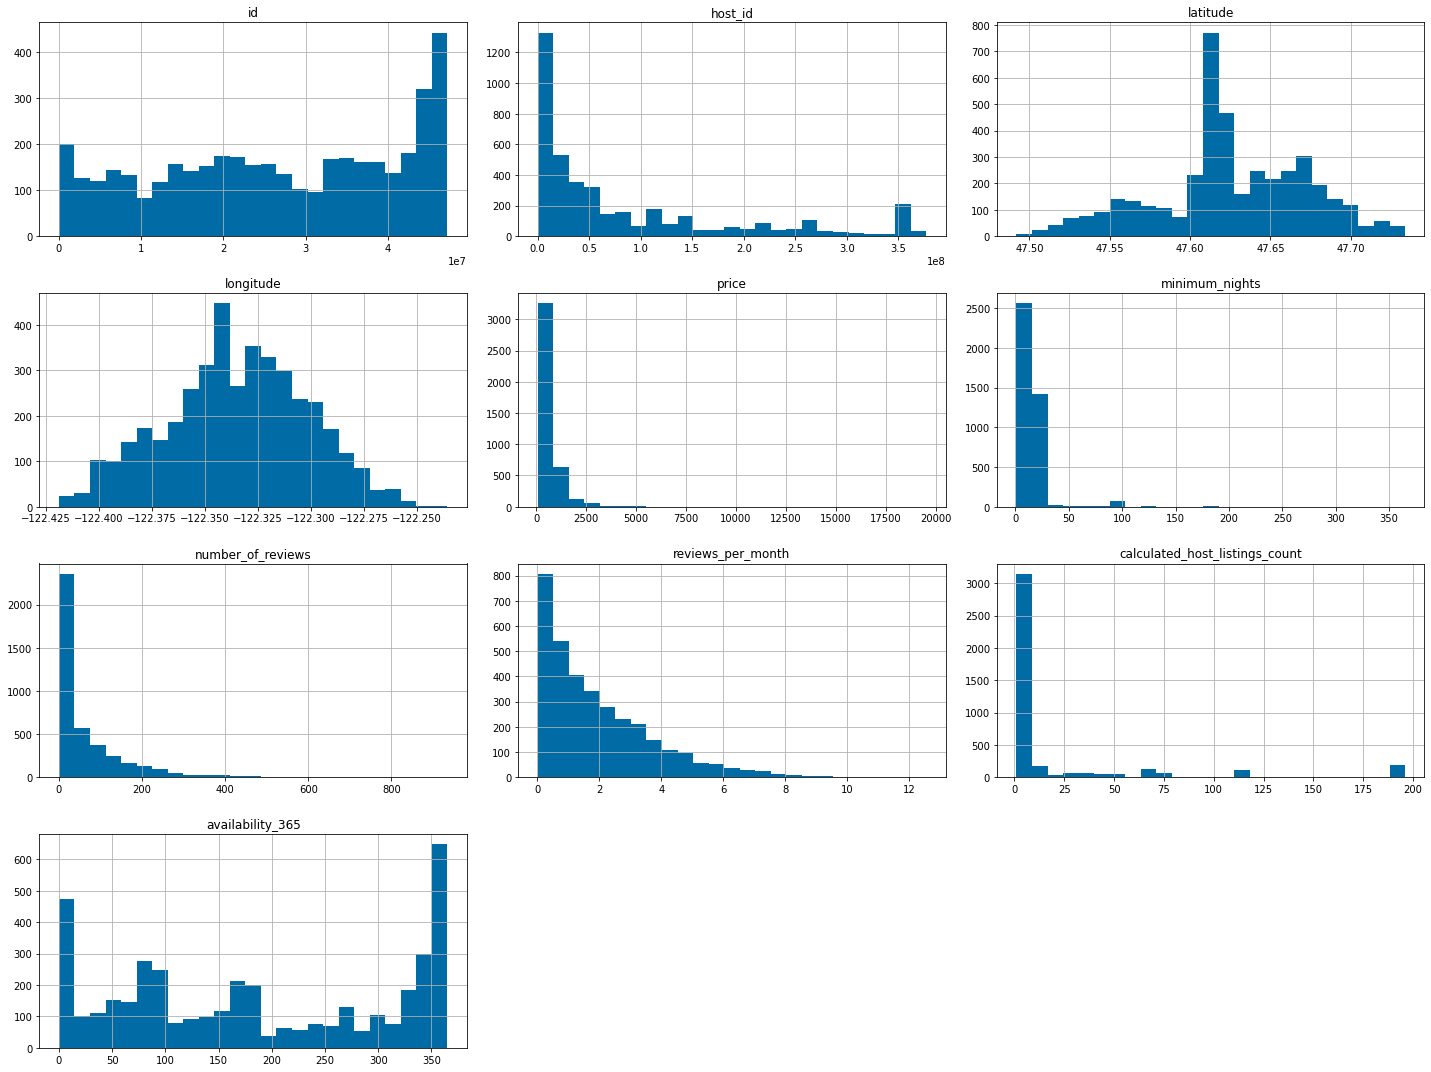

In [ ]:
# verificando o histograma das variáveis numéricas
plt.style.use('tableau-colorblind10')
df.hist(bins=25, figsize=(20,15));
plt.tight_layout()

### **Análise de *Outliers*** 

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. olhe, por exemplo, as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam na detecção de *outliers*. São elas:

*   Resumo estatístico por meio do método `describe`
*   Plotar `boxplots` para as variáveis mencionadas acima.

Antes de fazer o resumo estatístico, iremos verificar se existem valores em branco no dataset, esses valores também podem comprometer a análise e causar variações nos histogramas.

#### Limpando os dados ausentes do Dataset

Ao analisar um dataset, é importante verificar se existem valores nulos no banco de dados, uma vez que se houver uma grande quantidade de dados em branco, a análise da variável em questão pode ficar prejudicada. 

In [ ]:
# dados ausentes por variável
(df.isnull().sum()).sort_values(ascending=False)

reviews_per_month                 698
last_review                       698
availability_365                    0
calculated_host_listings_count      0
number_of_reviews                   0
minimum_nights                      0
price                               0
room_type                           0
longitude                           0
latitude                            0
neighbourhood                       0
neighbourhood_group                 0
host_name                           0
host_id                             0
name                                0
id                                  0
dtype: int64

In [ ]:
# excluindo entradas com dados ausentes
df.dropna(axis=0, inplace=True)
(df.isnull().sum()).sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

#### Resumo estatístico

In [ ]:
# resumo estatístico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month',
   'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000
mean,704.377339,11.369903,76.065708,1.973247,7.931358,178.957466
std,593.612903,15.301839,94.523023,1.796876,18.357943,126.925102
min,80.550000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,402.750000,2.000000,11.000000,0.550000,1.000000,72.000000
50%,531.630000,3.000000,40.000000,1.470000,1.000000,169.000000
75%,789.390000,30.000000,107.000000,2.920000,4.000000,312.000000
max,8055.000000,183.000000,935.000000,12.550000,196.000000,365.000000


Observando o resumo estatístico acima, podemos verificar algumas informações como:

* A variável `price` possui 75% dos seus valores abaixo de 789,39 reais, porém seu valor máximo é de R$8.055,00.
* As variáveis `price`, `minimum_nights` e `calculated_host_listings_count` possuem valores com grande discrepância, isso pode ser visto no histograma plotado anteriormente, onde parte dos dados era quase impossível de ser visualizada. Os *outliers*, são valores que destoam da média dos dados, sejam eles positivos ou negativos. A seguir  serão verificadas as colunas mencionadas acima. 

#### Verificando os *outliers* para as colunas `price`, `minimum_nights` e `calculated_host_listings_count`

In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  386.64
Limite superior de price:  1369.35
Limite inferior de price:  -177.21000000000004


In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  28.0
Limite superior de minimum_nights:  72.0
Limite inferior de minimum_nights:  -40.0


In [ ]:
# identificando os outliers para a variável calculated_host_listings_count
q1_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.25)
q3_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.75)
IQR_calculated_host_listings_count = q3_calculated_host_listings_count - q1_calculated_host_listings_count
print('IQR da variável calculated_host_listings_count: ', IQR_calculated_host_listings_count)

# definindo os limites                                       
sup_calculated_host_listings_count = q3_calculated_host_listings_count + 1.5 * IQR_calculated_host_listings_count
inf_calculated_host_listings_count = q1_calculated_host_listings_count - 1.5 * IQR_calculated_host_listings_count

print('Limite superior de calculated_host_listings_count: ', sup_calculated_host_listings_count)
print('Limite inferior de calculated_host_listings_count: ', inf_calculated_host_listings_count)

IQR da variável calculated_host_listings_count:  3.0
Limite superior de calculated_host_listings_count:  8.5
Limite inferior de calculated_host_listings_count:  -3.5


In [ ]:
# limpando o dataset

df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price>1369.35].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>72].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count>8.5].index, axis=0, inplace=True)

#### Boxplot para `price`

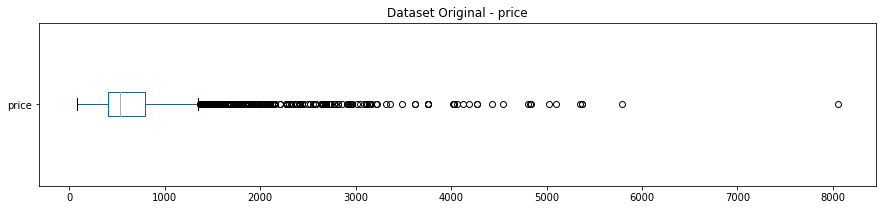

O dataset possui 3409 colunas
290 Entradas acima de 1369.35
Representam 8.51% do dataset


In [ ]:
# verificando o conjunto original para coluna price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 1369.35".format(len(df[df.price > 1369.35])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 1369.35]) / df.shape[0])*100))

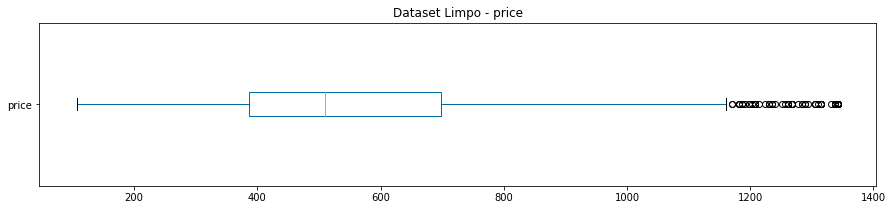

Tamanho original: 3409 colunas
Tamanho atual: 2635 colunas


In [ ]:
# verificando o conjunto atual
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0])) 

#### Boxplot para `minimum_nights`

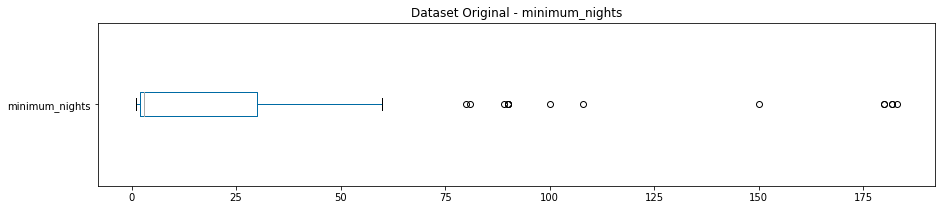

O dataset possui 3409 colunas
15 Entradas acima de 72
Representam 0.44% do dataset


In [ ]:
# verificando o conjunto original para coluna minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 72".format(len(df[df.minimum_nights > 72])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 72]) / df.shape[0])*100))

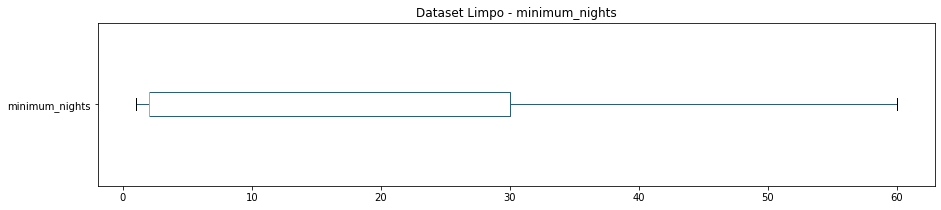

Tamanho original: 3409 colunas
Tamanho atual: 2635 colunas


In [ ]:
# verificando o conjunto atual
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0])) 

#### Boxplot para `calculated_host_listings_count`

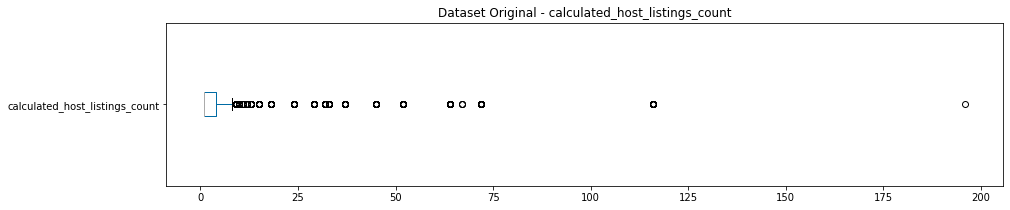

O dataset possui 3409 colunas
514 Entradas acima de 8.5
Representam 15.08% do dataset


In [ ]:
# verificando o conjunto original para coluna calculated_host_listings_count
fig, ax = plt.subplots(figsize=(15,3))
df.calculated_host_listings_count.plot(kind='box', vert=False);
ax.set_title('Dataset Original - calculated_host_listings_count')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 8.5".format(len(df[df.calculated_host_listings_count > 8.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.calculated_host_listings_count > 8.5]) / df.shape[0])*100))

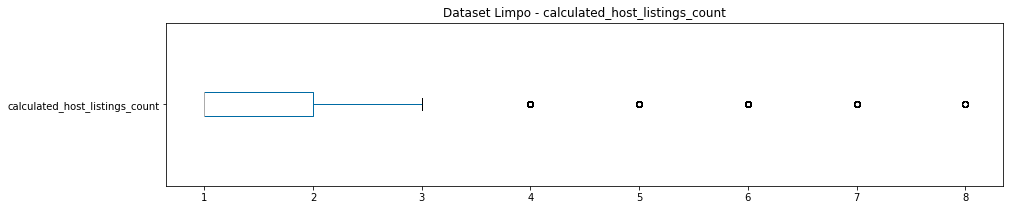

Tamanho original: 3409 colunas
Tamanho atual: 2635 colunas


In [ ]:
# verificando o conjunto atual
fig, ax = plt.subplots(figsize=(15,3))
df_clean.calculated_host_listings_count.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - calculated_host_listings_count')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

#### Histograma e resumo estatístico sem *outliers*

Após identificar e remover os *outliers* nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. Após as correções necessárias, vamos plotar novamente o histograma de variáveis e também o resumo estatístico atualizados.

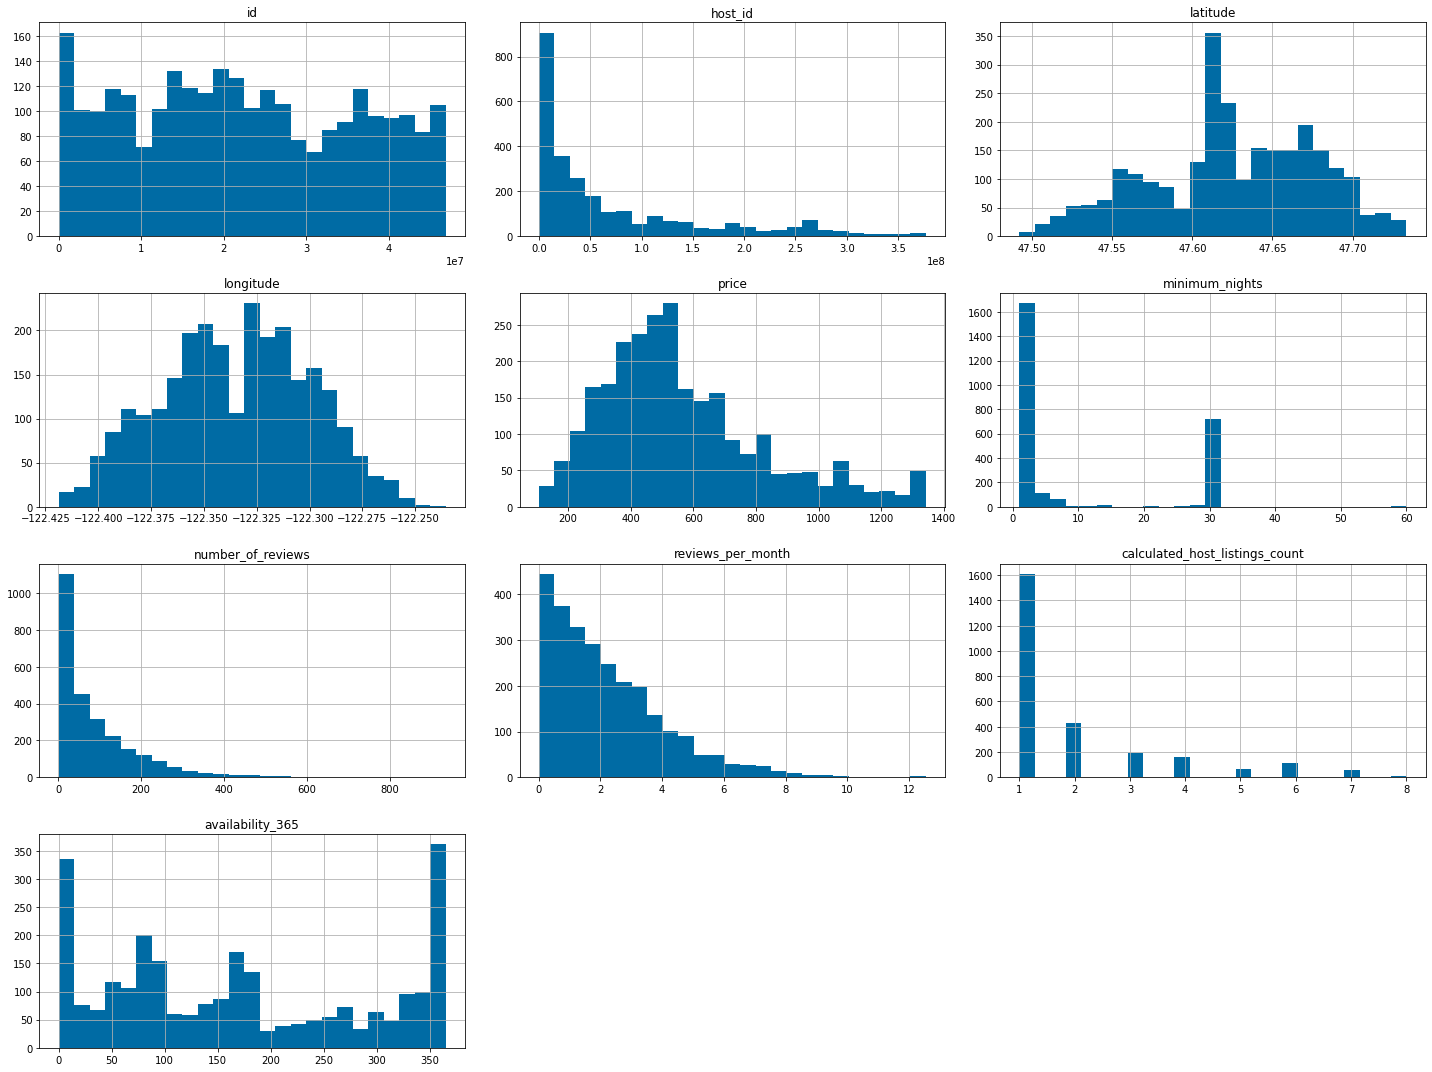

In [ ]:
# plotar o histograma com os dados atualizados
df_clean.hist(bins=25, figsize=(20,15));
plt.tight_layout()

In [ ]:
# resumo estatístico atualizado das variáveis numéricas
df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month',
   'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000
mean,566.896736,10.396584,88.757116,2.238668,1.956736,170.014421
std,261.525517,12.872345,100.667832,1.839523,1.587617,124.500547
min,107.400000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,386.640000,2.000000,16.000000,0.780000,1.000000,68.000000
50%,510.150000,2.000000,54.000000,1.820000,1.000000,156.000000
75%,698.100000,30.000000,130.000000,3.240000,2.000000,295.000000
max,1342.500000,60.000000,935.000000,12.550000,8.000000,365.000000


### **Matriz de correlação do *Dataset***

A seguir, será criada uma matriz de correlação e também um heatmap com as informações atualizadas do dataset. A partir dessa análise, é possível obter insights que poderiam passar despercebidos se utilizassemos somente histogramas para verificar os dados.

In [ ]:
# matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.042448,-0.102612,-0.123006,-0.062292,0.074525
minimum_nights,-0.042448,1.000000,-0.189375,-0.360520,0.057686,0.104030
number_of_reviews,-0.102612,-0.189375,1.000000,0.743966,-0.053117,0.060820
reviews_per_month,-0.123006,-0.360520,0.743966,1.000000,-0.050394,-0.034390
calculated_host_listings_count,-0.062292,0.057686,-0.053117,-0.050394,1.000000,0.109149
availability_365,0.074525,0.104030,0.060820,-0.034390,0.109149,1.000000


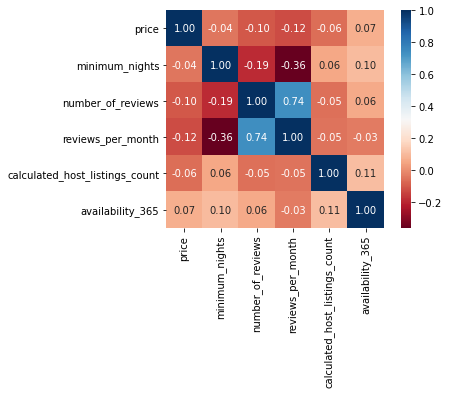

In [ ]:
# heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A matriz de correlações pode ser um pouco complexa de se entender, já que cruza todos os dados numéricos presentes no dataset. Utilizando um mapa de calor, as informações ficam mais fáceis de serem interpretadas, uma vez que os valores acima de zero já começam a apresentar alguma ligação. Por exemplo, as colunas `minimum_nights` e `availability_365` demonstram que o número mínimo de noites costuma a ser maior em propriedades que estão disponíveis durante todo o ano.  

### **Tipos de imóveis mais alugados no Airbnb?**

A coluna da variável room_type indica o tipo de  locação que está anunciada no Airbnb. Se você já utilizou o site, sabe  que existem inúmeras opções de apartamentos/casas inteiras, e também apenas o aluguel de  um quarto ou mesmo dividir o quarto com outras pessoas. Para verificar a quantidade de ocorrências de cada tipo de aluguel, utilizaremos o método `value_counts()`.

In [ ]:
# quantidade de cada tipo de imóvel
df_clean.room_type.value_counts()

Entire home/apt    2073
Private room        551
Shared room          10
Hotel room            1
Name: room_type, dtype: int64

In [ ]:
# porcentagem de cada tipo de imóvel
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    78.671727
Private room       20.910816
Shared room         0.379507
Hotel room          0.037951
Name: room_type, dtype: float64

### **Localidades com diárias mais caras e econômicas do *Dataset***

Ao planejar uma viagem, é sempre importante ter uma ideia das melhores localidades, com boa segurança e pontos de interesse próximos. O preço das diárias nem sempre reflete isso (por exemplo, propriedades na área central costumam a ter valores mais elevados por conta da facilidade de acesso, mas em contrapartida tendem a ser mais barulhentas e difíceis para se encontrar vagas de estacionamento) mas é um bom indicativo para se ter como ponto de partida para uma escolha mais assertiva. 
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação, vamos comparar tanto os bairros com as diárias mais altas quanto as mais econômicas.  



In [ ]:
# preço das localidades com diárias mais altas:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Yesler Terrace               860.274000
Portage Bay                  837.123333
Pike-Market                  809.796000
Central Business District    764.593235
Madison Park                 764.553750
Name: price, dtype: float64

In [ ]:
# preço das localidades com diárias mais econômicas:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:5]

neighbourhood
Holly Park            221.960000
Rainier View          296.021250
Riverview             340.995000
North College Park    357.894706
Pinehurst             376.667143
Name: price, dtype: float64

Observando o mapa da cidade, nota-se que as localidades com custo mais elevado, costumam a ficar em locais proxímos a lagos. Já as localidades mais econômicas, geralmente ficam em áreas mais internas da cidade, próximas a vias de grande movimentação. É importante salientar que todas as localidades listadas acima, possuem mais de uma propriedade, justamente para não termos discrepâncias nas informações. Para termos uma visão geral de todos os imóveis e sua faixa de preço, iremos plotar todas as propriedades disponíveis em função da sua latitude e longitude.

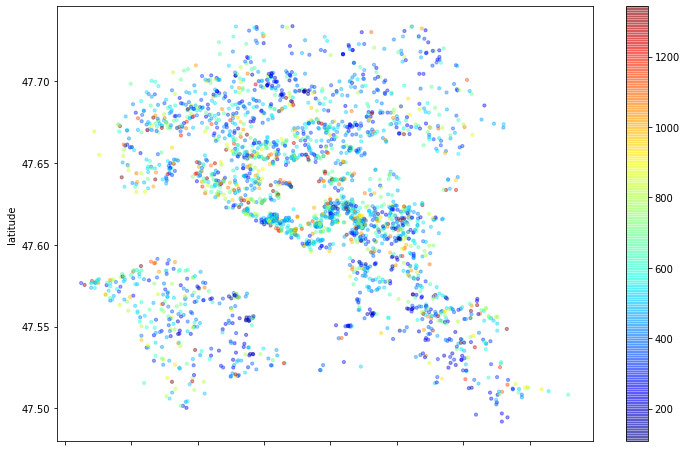

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Nuvem de Palavras da Cidade de Seattle**

Através da nuvem de palavras, é possível distinguir os termos mais utilizados nas descrições das propriedades, esses termos são utilizados para destacar as vantagens e características dos imóveis. Para essa análise, utilizaremos a base de dados completa para a cidade de Seattle, para extrair somente as entradas que estão na variável `description`.

In [ ]:
# importar pacotes para wordcloud
!pip install wordcloud -q
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# importar o arquivo complete_listings_seattle.csv para um DataFrame
df_word_cloud = pd.read_csv('https://raw.githubusercontent.com/fabiodotcom/DataFrames/main/complete_listings_seattle.csv')
df_word_cloud.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
# remoção das colunas em branco da coluna `description`
descr = df_word_cloud.dropna(subset=['description'], axis=0)['description']

In [ ]:
# exemplos de frases e palavras utilizadas na descrição dos imóveis
display(descr.iloc[10])
print('')

'<b>The space</b><br />“Home Away from Home with Italian Hospitality”<br /><br />GREAT HOTEL AND B&B ALTERNATIVE - Are you visiting Seattle for an Extended Vacation,  Corporate Project, Summer Internship, Medical stay, Relocating or just for a short visit? If you\'re looking for an alternative to living out of a suitcase, come live in our privately owned home for a Short Term, Long Term, Weekly and Monthly stay.<br /><br />You’ll love this peaceful "Home away from home” furnished Mother In Law Apartment Suite located on the lower level of a 1910 Craftsman/Farm home, situated on a 10,000 SQFT fenced and gated  lot.  The DAYLIGHT fully furnished, semi-basement apartment is a very open & spacious unit with a LG 1 BDR/1 Full Bath, with lots of windows, with its own private entrance, WIFI, Cable, fully furnished kitchen, dining bar, extra sleeping accommodations, (sofa/queen bed) TV, washer & dryer in unit, parking and use of the garden, yard, and back deck with BBQ area.<br /><br />Excelle

In [ ]:
# criando uma lista com todas as palavras da coluna `description`
complete_descr = ' '.join(d for d in descr)

# conferindo a quantidade de palavras
print('Total de Palavras: {}'.format(len(complete_descr)))

Total de Palavras: 3657823


A seguir, serão removidos os conectivos, que são palavras ou expressões que interligam as frases, períodos, orações, parágrafos, permitindo a sequência de ideias. Essas palavras serão removidas para priorizar termos mais diretos na nuvem de palavras. 

In [ ]:
# lista de conectivos
stopwords = set(STOPWORDS)
stopwords.update(["<br />", "<br>", "<b>", "</b>", "br", "di", "un"])

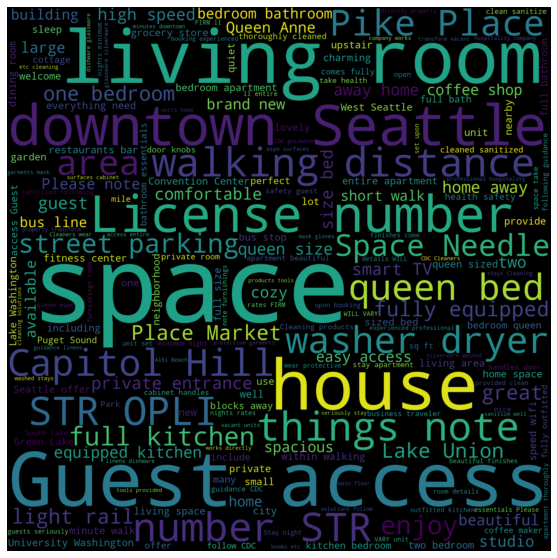

In [ ]:
# nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=2000,height=2000).generate(complete_descr)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show(wordcloud)

## **Conclusões**


Após a análise dos dados, pode-se concluir que é de extrema importância realizar uma pesquisa aprofundada ao planejar uma viagem. Tanto para se ter uma melhor ideia da oferta de hospedagens, mas também para escolher os melhores locais visando o fator custo/benefício. A análise de dados auxilia nesse processo, e, com poucas linhas de código, é possível obter informações textuais e gráficas que nem sempre estão disponíveis de maneira aberta.